## Observations and Insights

In [1]:
#Insight (1)
#From the very first analysis of mean, median, standard deviation, and variance of tumor volume, we could already 
#start to see that Ramicane and Capomulin would be the best drugs.  They had the lowest mean/median and also the lowest
#standard deviation/variance

#Insight (2)
#The Pie plots and bar charts show that each drug and each sex had a fair share of representation.  Out of 1893 rows in
#the study, no drug had more than 230 and no less than 161. The sex split was close to 50/50.

#Insight (3)
#The deeper look at mouse l509 through the line chart showed the effectiveness of Capomulin on this one mouse.
#Tumor volume decreased over time. After running the same line chart for s185. The result was even better

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import statistics as stat
import scipy as sc
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
mouse_metadata 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [5]:
# Combine the data into a single dataset
# Merge the two datasets on "Mouse Data" so that no data is lost 1893 rows just like the study results.
mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Export file as a CSV, without the Pandas index, but with the header
mouse_study_df.to_csv("Output/mousestudy.csv", index=False, header=True)

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
ramicane = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Ramicane"]
ramicane_vol = ramicane['Tumor Volume (mm3)']
mean_ramicane_vol = np.mean(ramicane_vol)
med_ramicane_vol = np.median(ramicane_vol)
var_ramicane_vol = np.var(ramicane_vol,ddof = 0)
std_ramicane_vol = np.std(ramicane_vol,ddof = 0)

In [8]:
capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Capomulin"]
capomulin_vol = capomulin['Tumor Volume (mm3)']
mean_capomulin_vol = np.mean(capomulin_vol)
med_capomulin_vol = np.median(capomulin_vol)
var_capomulin_vol = np.var(capomulin_vol,ddof = 0)
std_capomulin_vol = np.std(capomulin_vol,ddof = 0)

In [9]:
infubinol = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Infubinol"]
infubinol_vol = infubinol['Tumor Volume (mm3)']
mean_infubinol_vol = np.mean(infubinol_vol)
med_infubinol_vol = np.median(infubinol_vol)
var_infubinol_vol = np.var(infubinol_vol,ddof = 0)
std_infubinol_vol = np.std(infubinol_vol,ddof = 0)

In [10]:
placebo = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Placebo"]
placebo_vol = placebo['Tumor Volume (mm3)']
mean_placebo_vol = np.mean(placebo_vol)
med_placebo_vol = np.median(placebo_vol)
var_placebo_vol = np.var(placebo_vol,ddof = 0)
std_placebo_vol = np.std(placebo_vol,ddof = 0)

In [11]:
ceftamin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Ceftamin"]
ceftamin_vol = ceftamin['Tumor Volume (mm3)']
mean_ceftamin_vol = np.mean(ceftamin_vol)
med_ceftamin_vol = np.median(ceftamin_vol)
var_ceftamin_vol = np.var(ceftamin_vol,ddof = 0)
std_ceftamin_vol = np.std(ceftamin_vol,ddof = 0)

In [12]:
stelasyn = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Stelasyn"]
stelasyn_vol = stelasyn['Tumor Volume (mm3)']
mean_stelasyn_vol = np.mean(stelasyn_vol)
med_stelasyn_vol = np.median(stelasyn_vol)
var_stelasyn_vol = np.var(stelasyn_vol,ddof = 0)
std_stelasyn_vol = np.std(stelasyn_vol,ddof = 0)

In [13]:
zoniferol = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Zoniferol"]
zoniferol_vol = zoniferol['Tumor Volume (mm3)']
mean_zoniferol_vol = np.mean(zoniferol_vol)
med_zoniferol_vol = np.median(zoniferol_vol)
var_zoniferol_vol = np.var(zoniferol_vol,ddof = 0)
std_zoniferol_vol = np.std(zoniferol_vol,ddof = 0)

In [14]:
ketapril = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Ketapril"]
ketapril_vol = ketapril['Tumor Volume (mm3)']
mean_ketapril_vol = np.mean(ketapril_vol)
med_ketapril_vol = np.median(ketapril_vol)
var_ketapril_vol = np.var(ketapril_vol,ddof = 0)
std_ketapril_vol = np.std(ketapril_vol,ddof = 0)

In [15]:
propriva = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Propriva"]
propriva_vol = propriva['Tumor Volume (mm3)']
mean_propriva_vol = np.mean(propriva_vol)
med_propriva_vol = np.median(propriva_vol)
var_propriva_vol = np.var(propriva_vol,ddof = 0)
std_propriva_vol = np.std(propriva_vol,ddof = 0)

In [16]:
naftisol = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == "Naftisol"]
naftisol_vol = naftisol['Tumor Volume (mm3)']
mean_naftisol_vol = np.mean(naftisol_vol)
med_naftisol_vol = np.median(naftisol_vol)
var_naftisol_vol = np.var(naftisol_vol,ddof = 0)
std_naftisol_vol = np.std(naftisol_vol,ddof = 0)

In [17]:
# Convert a single dictionary containing lists into a dataframe
drug_df = pd.DataFrame(
    {"Drug": ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril","Propriva","Naftisol"],
    "Mean": [mean_ramicane_vol,mean_capomulin_vol,mean_infubinol_vol,mean_placebo_vol,mean_ceftamin_vol,
            mean_stelasyn_vol,mean_zoniferol_vol,mean_ketapril_vol,mean_propriva_vol,mean_naftisol_vol],
    "Median": [med_ramicane_vol,med_capomulin_vol,med_infubinol_vol,med_placebo_vol,med_ceftamin_vol,
            med_stelasyn_vol,med_zoniferol_vol,med_ketapril_vol,med_propriva_vol,med_naftisol_vol],
    "Variance": [var_ramicane_vol,var_capomulin_vol,var_infubinol_vol,var_placebo_vol,var_ceftamin_vol,
            var_stelasyn_vol,var_zoniferol_vol,var_ketapril_vol,var_propriva_vol,var_naftisol_vol],
    "Standard Deviation": [std_ramicane_vol,std_capomulin_vol,std_infubinol_vol,std_placebo_vol,std_ceftamin_vol,
            std_stelasyn_vol,std_zoniferol_vol,std_ketapril_vol,std_propriva_vol,std_naftisol_vol]}
)
drug_df

,Drug,Mean,Median,Variance,Standard Deviation
0,Ramicane,40.216745,40.673236,23.383692,4.835669
1,Capomulin,40.675741,41.557809,24.839296,4.983904
2,Infubinol,52.884795,51.820584,42.886388,6.548770
3,Placebo,54.033581,52.288934,60.830138,7.799368
4,Ceftamin,52.591172,51.776157,39.069446,6.250556
5,Stelasyn,54.233149,52.431737,59.122106,7.689090
6,Zoniferol,53.236507,51.818479,48.266689,6.947423
7,Ketapril,55.235638,53.698743,68.188930,8.257659
8,Propriva,52.322552,50.854632,42.088020,6.487528
9,Naftisol,54.331565,52.509285,65.817708,8.112811


In [18]:
# Export file as a CSV, without the Pandas index, but with the header
drug_df.to_csv("Output/drug.csv", index=False, header=True)

## Bar plots

In [19]:
tests = [len(ramicane_vol), len(capomulin_vol),len(infubinol_vol),len(placebo_vol),len(ceftamin_vol),
        len(stelasyn_vol),len(zoniferol_vol),len(ketapril_vol),len(propriva_vol),len(naftisol_vol),]
tests

[228, 230, 178, 181, 178, 181, 182, 188, 161, 186]

In [20]:
# Create an array that contains the number of tests each drug has
x_axis = np.arange(len(drug_df['Drug']))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_test_df= pd.DataFrame(
    {"Drug": ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol",
              "Ketapril","Propriva","Naftisol"],
    "Tests": [len(ramicane_vol), len(capomulin_vol),len(infubinol_vol),len(placebo_vol),len(ceftamin_vol),
        len(stelasyn_vol),len(zoniferol_vol),len(ketapril_vol),len(propriva_vol),len(naftisol_vol)]})

drug_test_df

,Drug,Tests
0,Ramicane,228
1,Capomulin,230
2,Infubinol,178
3,Placebo,181
4,Ceftamin,178
5,Stelasyn,181
6,Zoniferol,182
7,Ketapril,188
8,Propriva,161
9,Naftisol,186


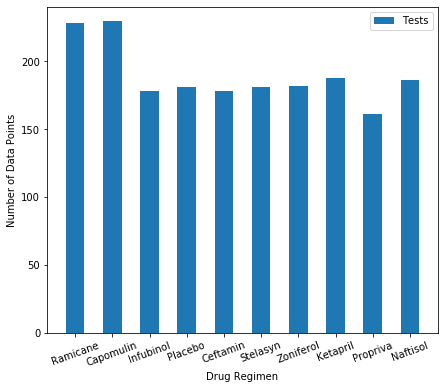

In [22]:
drug_test_plot = drug_test_df.plot(kind="bar", figsize=(7,6))
#Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril",
                            "Propriva","Naftisol"])
plt.xticks(rotation=20)
# Give our chart some labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tests)+10)
plt.savefig("Images/barchartpd.png")

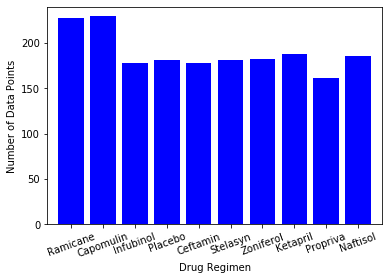

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, tests, color='b')
#Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril",
                            "Propriva","Naftisol"])
plt.xticks(rotation=20)
# Give our chart some labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tests)+10)
plt.savefig("Images/barchartplt.png")

## Pie plots

In [24]:
male = mouse_study_df.loc[mouse_study_df['Sex'] == "Male"]
female = mouse_study_df.loc[mouse_study_df['Sex'] == "Female"]

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df= pd.DataFrame(
    {"Counts": [len(male), len(female)]})

sex_df

,Counts
0,958
1,935


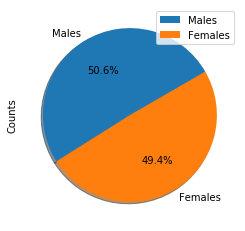

In [26]:
labels = ["Males", "Females"]
sex_plot = sex_df.plot(kind='pie', labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=30, subplots=True)
plt.savefig("Images/piechartpd.png")

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [len(male), len(female)]

# The colors of each section of the pie chart
colors = ["red", "blue"]

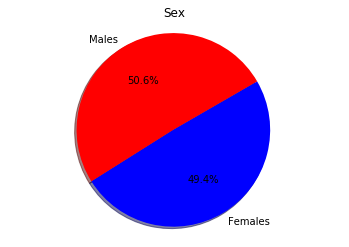

In [28]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Sex")
plt.savefig("Images/piechartplt.png")

## Quartiles, outliers and boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_tot = capomulin_vol.sum()
print(capomulin_tot)
ramicane_tot = ramicane_vol.sum()
print(ramicane_tot)
infubinol_tot = infubinol_vol.sum()
print(infubinol_tot)
ceftamin_tot = ceftamin_vol.sum()
print(ceftamin_tot)

9355.42046243
9169.41787521
9413.49352933
9361.228582110001


In [30]:
top4_df= pd.DataFrame(
    {"Drug": ["Ramicane","Capomulin","Infubinol","Ceftamin"],
    "Tests": [ramicane_tot, capomulin_tot,infubinol_tot,ceftamin_tot,]})

top4_df

top4_df.to_csv("Output/top4_total.csv", index=False, header=True)

In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")

Values below 24.18658646249998 could be outliers for Ramicane.
Values above 57.48804812250001 could be outliers for Ramicane.


In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Capumulin.")
print(f"Values above {upper_bound} could be outliers for Capumulin.")

Values below 26.714832162499995 could be outliers for Capumulin.
Values above 55.9711007025 could be outliers for Capumulin.


In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = infubinol_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")

Values below 32.309217298749985 could be outliers for Infubinol.
Values above 72.31757996875001 could be outliers for Infubinol.


In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ceftamin_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")

Values below 32.818911426250004 could be outliers for Ceftamin.
Values above 71.19095325625 could be outliers for Ceftamin.


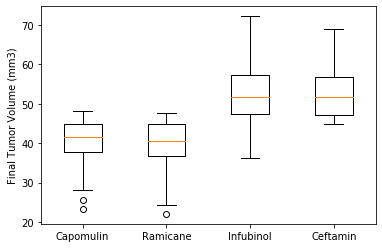

In [35]:
# Example outlier plot of Final Tumor Volume
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol])
#Tell matplotlib where we would like to place each of our x axis headers
x_axis2 = [1,2,3,4]
tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.savefig("Images/BoxPlot.png")

## Line and scatter plots

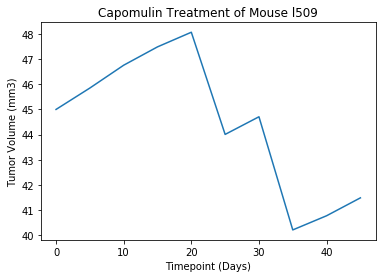

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l509 = mouse_study_df.loc[mouse_study_df['Mouse ID'] == "l509"]
l509_vol = l509['Tumor Volume (mm3)']

x_axis3 = [0,5,10,15,20,25,30,35,40,45]
# Create a graph based upon the two lists we have created
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(x_axis3, l509_vol)
plt.savefig("Images/Line_l509.png")

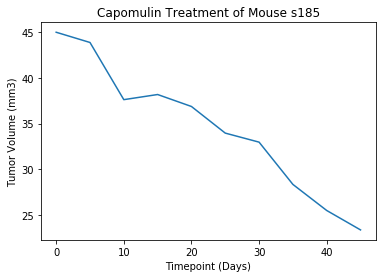

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 = mouse_study_df.loc[mouse_study_df['Mouse ID'] == "s185"]
s185_vol = s185['Tumor Volume (mm3)']

x_axis3 = [0,5,10,15,20,25,30,35,40,45]
# Create a graph based upon the two lists we have created
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.plot(x_axis3, s185_vol)
plt.savefig("Images/Line_s185.png")

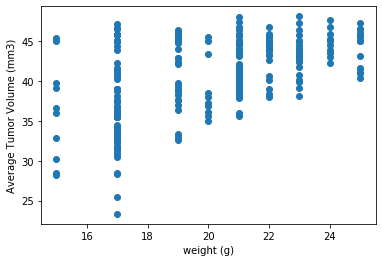

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("Images/Tumor_weight.png")

The r-squared is: 0.27636002234559165


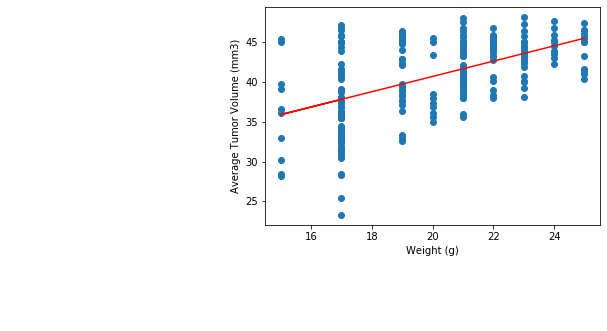

In [39]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Tumor_weight_regr.png")